AB Testing


In [29]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import scipy.stats as scs

In [4]:
df = pd.read_csv("../data/AdSmartABdata.csv")

In [5]:
df.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [6]:
# checking the size of the data
df.shape

(8077, 9)

In [7]:
# checking for missing values
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

1. Which online users belong to the control and exposed groups?

In [8]:
df.groupby("experiment")["auction_id"].count()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

2. How are the users targeted?


3. Could we use the counts of yes and no answers to make a judgement on which experiment is 
performing better? For example if #yes > #no for the exposed group than the control group, 
could we declare that the ad had a significant impact Why or why not?


In [14]:
agg = df.groupby("experiment").agg(
{"yes":"sum"})


In [15]:
agg

,yes
experiment,
control,264
exposed,308


In [16]:
agg = df.groupby("experiment").agg(
{"no":"sum"})

In [17]:
agg

,no
experiment,
control,322
exposed,349


4. What is the statistical process that generates the data? Which kind of statistical model will you 
use if you were to simulate the data?


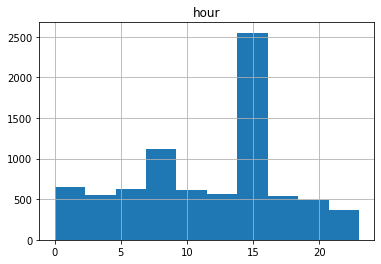

In [18]:
df.hist(["hour"]); # normal distribution

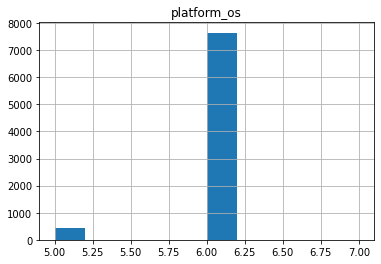

In [19]:
df.hist(["platform_os"]);

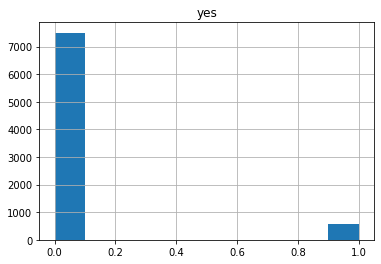

In [20]:
df.hist(["yes"]);

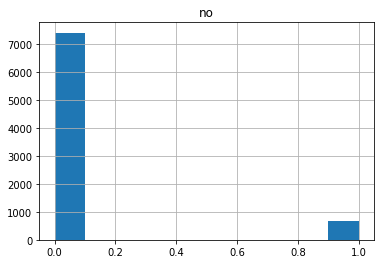

In [21]:
df.hist(["no"]);

5. Assessment of the statistical significance of an A/B test is dependent on what kind of probability 
distribution the experimental data follows. Given your answer above, which statistical 
tests (z-test, t-test, etc.) are appropriate to use for this project?


In [25]:
conditions = [df.yes == 1 , df.no == 1]
choices = [1, 0]
df['y'] = np.select(conditions, choices, default=2)

In [26]:
y = df.y
x = df[['hour','platform_os','yes','no']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
result =  model.summary()

In [27]:
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.297e+31
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        04:16:04   Log-Likelihood:             2.5624e+05
No. Observations:                8077   AIC:                        -5.125e+05
Df Residuals:                    8072   BIC:                        -5.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0000    1.2e-15   1.67e+15      0.000       2.000       2.000
hour         5.117e-17   7.84e-18      6.530      0.000    3.58e-17    6.65e-17
platform_os -7.355e-16   2.01e-16     -3.662      0.000   -1.13e-15   -3.42e-16
yes            -1.0000   1.76e-16  -5.68e+15      0.000      -1.000      -1.000
no             -2.0000   1.64e-16  -1.22e+16      0.000      -2.000      -2.000
==============================================================================
Omnibus:                     3756.805   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16838.985
Skew:                           2.328   Prob(JB):                         0.00
Kurtosis:                       8.326   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. In classical (frequentist) A/B testing, we use p-values to measure the significance of the experimental 
feature (being exposed to an ad in our case)  over the null hypothesis (the hypothesis that there is no 
difference in brand awareness between the exposed and control groups in the current case). 
How are p-values computed? What information do p-values provide? 
What are the  type-I and type-II errors you may have in the analysis? 
Can you comment on which error types p-values are related?


7. Perform data exploration to count unique values of categorical variables, 
make histogram, relational, and other necessary plots to help understand the data. 
For each of the plots you produce, write a description of what the plot shows in markdown cells.


In [34]:
class PlottingFunctions:
    def _init_(self):
        """
        Initializing PlottingFunctions class
        """
        
    def plot_norm_dist(self, ax, mu, std, with_CI=False, sig_level=0.05, label=None):
        """
            Adds a normal distribution to the axes provided
            Example:
                plot_norm_dist(ax, 0, 1)  # plots a standard normal distribution
            Parameters:
                ax (matplotlib axes)
                mu (float): mean of the normal distribution
                std (float): standard deviation of the normal distribution
            Returns:
                None: the function adds a plot to the axes object provided
        """
        x = np.linspace(mu - 12 * std, mu + 12 * std, 1000)
        y = scs.norm(mu, std).pdf(x)
        ax.plot(x, y, label=label)

        if with_CI:
            self.plot_CI(ax, mu, std, sig_level=sig_level)
            
    def plot_CI(self, ax, mu, s, sig_level=0.05, color='grey'):
        """
        Calculates the two-tailed confidence interval and adds the plot to
        an axes object.
        Example:
            plot_CI(ax, mu=0, s=stderr, sig_level=0.05)
        Parameters:
            ax (matplotlib axes)
            mu (float): mean
            s (float): standard deviation
        Returns:
            None: the function adds a plot to the axes object provided
        """
        left, right = ABT.confidence_interval(sample_mean=mu, sample_std=s,
                                      sig_level=sig_level)
        ax.axvline(left, c=color, linestyle='--', alpha=0.5)
        ax.axvline(right, c=color, linestyle='--', alpha=0.5)
        
    def plot_null(self, ax, stderr):
        """
        Plots the null hypothesis distribution where if there is no real change,
        the distribution of the differences between the test and the control groups
        will be normally distributed.
        The confidence band is also plotted.
        Example:
            plot_null(ax, stderr)
        Parameters:
            ax (matplotlib axes)
            stderr (float): the pooled standard error of the control and test group
        Returns:
            None: the function adds a plot to the axes object provided
        """
        self.plot_norm_dist(ax, 0, stderr, label="Null")
        self.plot_CI(ax, mu=0, s=stderr, sig_level=0.05)
        
    def plot_alt(self, ax, stderr, mde):
        """
        Plots the alternative hypothesis distribution where if there is a real
        change, the distribution of the differences between the test and the
        control groups will be normally distributed and centered around d_hat
        The confidence band is also plotted.
        Example:
            plot_alt(ax, stderr, mde=0.025)
        Parameters:
            ax (matplotlib axes)
            stderr (float): the pooled standard error of the control and test group
        Returns:
            None: the function adds a plot to the axes object provided
        """
        self.plot_norm_dist(ax, mde, stderr, label="Alternative")
        
    def show_area(ax, mde, stderr, sig_level, area_type=None):
        """
        Fill between upper significance boundary and distribution for
        alternative hypothesis
        """
        left, right = ABT.confidence_interval(sample_mean=0, sample_std=stderr,
                                      sig_level=sig_level)
        x = np.linspace(-12 * stderr, 12 * stderr, 1000)
        null = ABT.ab_dist(stderr, 'control')
        alternative = ABT.ab_dist(stderr, mde, 'exposed')
        
        # if area_type is power
        # Fill between upper significance boundary and distribution for alternative
        # hypothesis
        if area_type == 'power':
            ax.fill_between(x, 0, alternative.pdf(x), color='green', alpha='0.25',
                            where=(x > right))
            ax.text(-5 * stderr, null.pdf(0),
                    'power = {0:.3f}'.format(1 - alternative.cdf(right)),
                    fontsize=12, ha='right', color='k')
            
         # if area_type is alpha
         # Fill between upper significance boundary and distribution for null
         # hypothesis
        if area_type == 'alpha':
             ax.fill_between(x, 0, null.pdf(x), color='blue', alpha='0.25',
                             where=(x > right))
             ax.text(-3 * stderr, null.pdf(0),
                     'alpha = {0:.3f}'.format(1 - null.cdf(right)),
                     fontsize=12, ha='right', color='k')

        # if area_type is beta
        # Fill between distribution for alternative hypothesis and upper
        # significance boundary
        if area_type == 'beta':
            ax.fill_between(x, 0, alternative.pdf(x), color='red', alpha='0.25',
                            where=(x < right))
            ax.text(-1 * stderr, null.pdf(0),
                    'beta = {0:.3f}'.format(alternative.cdf(right)),
                    fontsize=12, ha='right', color='k')

In [37]:
class ABTesting:
    def _init_(self):
        """
        Initializing ABTesting class with functions used on ABTesting
        """
        
    def pooled_prob(self, Control, Exposed, X_A, X_B):
        """Returns pooled probability for two samples
        """
        return (X_A + X_B) / (Control + Exposed)
    
    def pooled_SE(self, Control, Exposed, X_A, X_B):
        """Returns the pooled standard error for two samples"""
        p_hat = self.pooled_prob(Control, Exposed, X_A, X_B)
        SE = np.sqrt(p_hat * (1 - p_hat) * (1/Control + 1/Exposed))
        return SE
    
    def z_val(self, sig_level=0.05, two_tailed=True):
        """
            Returns the z value for a given significance level
        """
        z_dist = scs.norm()
        if two_tailed:
            sig_level = sig_level/2
            area = 1 - sig_level
        else:
            area = 1 - sig_level
            
        z = z_dist.ppf(area)
        
        return z
    
    def confidence_interval(self, sample_mean=0, sample_std=1, sample_size=1,
                            sig_level=0.05):
        """
            Returns the confidence interval as a tuple
        """
        z = self.z_val(sig_level)
        
        left = sample_mean - z * sample_std/np.sqrt(sample_size)
        right = sample_mean + z * sample_std/np.sqrt(sample_size)
        
        return (left,right)
    
    def ab_dist(self, stderr, mde=0, group_type='control'):
        """
           Returns a distribution object depending on group type
           Examples:
           Parameters:
               stderr (float): pooled standard error of two independent samples
               mde (float): the mean difference between two independent samples
               group_type (string): 'control' and 'exposed' are supported
           Returns:
               dist (scipy.stats distribution object) 
        """
        if group_type == 'control':
            sample_mean = 0

        elif group_type == 'exposed':
            sample_mean = mde
            
        # create a normal distribution which is dependent on mean and std dev
        dist = scs.norm(sample_mean, stderr)
        
        return dist
    
    def p_val(self, Control, Exposed, p_A, p_B):
        """
            Returns the p_value for an A/B test
        """
        return scs.binom(Control, p_A).pmf(p_B * Exposed)

In [46]:
class HypothesisPlot:
    def _init_(self):
        """
        Initializing HypothesisPlot class
        """
        
    def hypo_plot(self, Control, Exposed, bcr, mde, sig_level=0.05, show_power=False, show_beta=False,
                  show_alpha=False, show_p_value=False, show_legend=True):
        """
        Example plot of AB test
        Example:
            abplot(n=4000, bcr=0.11, mde=0.03)
        Parameters:
            n (int): total sample size for both control and test groups (N_A + N_B)
            bcr (float): base conversion rate; conversion rate of control
            mde: difference in conversion rate between the control and test
                groups. It is the **minimal detectable effect** when
                calculating minimum sample size or **lift** when discussing
                positive improvement desired from launching a change.
        Returns:
            None: the function plots an AB test as two distributions for
            visualization purposes
        """
        #create a plot object
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # define parameters to find pooled standard error
        X_C = bcr * Control
        X_E = (bcr + mde) * Exposed
        stderr = ABT.pooled_SE(Control, Exposed, X_C, X_E)
        
        # plot the distribution of the null and alternative hypothesis
        PLTF.plot_null(ax, stderr)
        PLTF.plot_alt(ax, stderr, mde)
        
        # set extent of plot area
        ax.set_xlim(-8 * stderr, 8 * stderr)
        
        # shade areas according to user input
        if show_power:
            PLTF.show_area(ax, mde, stderr, sig_level, area_type='power')
        if show_alpha:
            PLTF.show_area(ax, mde, stderr, sig_level, area_type='alpha')
        if show_beta:
            PLTF.show_area(ax, mde, stderr, sig_level, area_type='beta')
            
        # show p_value based on the binomial distributions for the two groups
        if show_p_value:
            null = ABT.ab_dist(stderr, 'control')
            p_value = ABT.p_val(Control, Exposed, bcr, bcr+mde)
            ax.text(3 * stderr, null.pdf(0),
                    'p-value = {0:.3f}'.format(p_value),
                    fontsize=12, ha='left')
            
        # option to show legend
        if show_legend:
            plt.legend()

        plt.xlabel('d')
        plt.ylabel('PDF')
        plt.show()
        

In [47]:
class DistributionPlots:
    def _init_(self):
        """
        Initializing DistributionPlots class
        """
        
    def cont_distribution(self, C_aware, C_total, C_cr, E_cr) -> None:
        fig, ax = plt.subplots(figsize=(12,6))
        x = np.linspace(C_aware-49, C_aware+50, 100)
        y = scs.binom(C_total, C_cr).pmf(x)
        ax.bar(x, y, alpha=0.5)
        ax.axvline(x=E_cr * C_total, c='blue', alpha=0.75, linestyle='--')
        plt.xlabel('Aware')
        plt.ylabel('probability')
        plt.show()
        
    def cont_exp_distribution(self, C_aware, E_aware, C_total, E_total, C_cr, E_cr) -> None:
        fig, ax = plt.subplots(figsize=(12,6))
        xC = np.linspace(C_aware-49, C_aware+50, 100)
        yC = scs.binom(C_total, C_cr).pmf(xC)
        ax.bar(xC, yC, alpha=0.5)
        xE = np.linspace(E_aware-49, E_aware+50, 100)
        yE = scs.binom(E_total, E_cr).pmf(xE)
        ax.bar(xE, yE, alpha=0.5)
        plt.xlabel('Aware')
        plt.ylabel('probability')
        #plt.show()
        
    def null_alt_distribution(self, C_total, E_total, C_cr, E_cr) -> None:
        bcr = C_cr
        mde = E_cr - C_cr
        HPP.hypo_plot(C_total, E_total, bcr, mde, show_power=True, show_beta=True, show_alpha=True, show_p_value=True)

In [48]:
HPP = HypothesisPlot() 
ABT = ABTesting() 
PLTF = PlottingFunctions() 
DP = DistributionPlots()

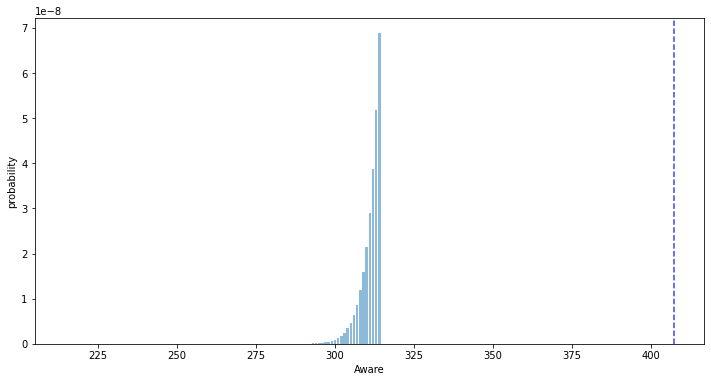

In [52]:
DP.cont_distribution(264,4071,0.1,0.1)

In [ ]:
#REFERENCE
# A Conditional Sequential Test for the Equality of Two Binomial Proportions
# William Q. Meeker, Jr
# Journal of the Royal Statistical Society. Series C (Applied Statistics)
# Vol. 30, No. 2 (1981), pp. 109-115
class ConditionalSPRT:
    def __init__(self,exposed,control,odd_ratio,alpha=0.05,beta=0.10,stop=None):
        self.exposed = exposed
        self.control = control
        self.odd_ration = odd_ration
            
    def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
      """
       #
      # Meeker's SPRT for matched `x` (treatment) and `y` (control), 
      # both indicator responses, likelihood ratio t1, error rates alpha and beta,
      # and (optionally) truncation after trial stop.
      #
      # The return variable contains these elements:
      #(outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)
      # * outcome:   "continue," "reject null," or "accept null".
      # * n: number observation used for the decsion
      # * k:     Index at which the outcome decision was made (or NA)
      # * l:     lower critical point
      # * u:     upper critical point
      # * truncate_decision: The approximate decision made after truncate point
      # * truncated: If the test was truncated, the value of `n.0`; NA otherwise
      # * x1:       Original data `x`, cumulative
      # * r:         Cumulative sum of x+y
      # * stats:     Series of cumulative sums of log probability ratios
      # * limits:    Two rows giving lower and upper critical limits, respectively
      #
      """
            if t1<=1:
                printLog('warning',"Odd ratio should exceed 1.")
            if (alpha >0.5) | (beta >0.5):
                printLog('warning',"Unrealistic values of alpha or beta were passed."
                         +" You should have good reason to use large alpha & beta values")
            if stop!=None:
                stop=math.floor(n0)

            def comb(n, k):
                return factorial(n) // factorial(k) // factorial(n - k)

            def lchoose(b, j):
                a=[]
                if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                    if len(j)<2:
                        j=j[0]
                if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                    for k in j:
                        n=b
                        if (0 <= k) & (k<= n):
                            a.append(math.log(comb(n,k)))
                        else:
                            a.append(0)
                else:
                    n=b
                    k=j
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)

                return np.array(a)

            def g(x,r,n,t1,t0=1):
              """
             #
              # Meeker's (1981) function `g`, the log probability ratio.
              # 
              """
                return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

            def h(x,r,n,t=1):
              """
              #
              # Reciprocal of Meeker's (1981) function `h`: the conditional probability of 
              # `x` given `r` and `n`, when the odds ratio is `t`.
              #
              # `x` is his "x1", the number of positives in `n` control trials.
              # `r` is the total number of positives.
              # `n` is the number of (control, treatment) pairs.
              # `t` is the odds ratio.
              #
              """
                return f(r,n,t,offset=ftermlog(x,r,n,t))

            def f(r,n,t,offset=0):
              """#
              # Meeker's (1981) function exp(F(r,n,t)), proportional to the probability of 
              #  `r` (=x1+x2) in `n` paired trials with an odds ratio of `t`.
              #
              # This function does *not* vectorize over its arguments.
              #"""
                upper=max(0,r-n)
                lower=min(n,r)
                rng=list(range(upper,lower+1))
                return np.sum(fterm(rng,r,n,t,offset))

            def fterm(j,r,n,t,offset=0):
                ftlog=ftermlog(j,r,n,t,offset)
                return np.array([math.exp(ex) for ex in ftlog])

            def ftermlog(j,r,n,t,offset=0):
              """
              #
              # Up to an additive constant, the log probability that (x1, x1+x2) = (j, r) 
              # in `n` paired trials with odds ratio of `t`.
              #
              # `offset` is used to adjust the result to avoid under/overflow.
              #
              """
                xx=r-j
                lch=lchoose(n,j)
                lchdiff=lchoose(n,xx)
                lg=np.array(j)*math.log(t)
                lgsum=lch+lchdiff
                lgsum2=lgsum+lg
                lgdiff=lgsum2-offset

                return lgdiff

            def logf(r,n,t,offset=0):
              """
              #
              # A protected vesion of log(f), Meeker's function `F`.
              #
              """
                z=f(r,n,t,offset)
                if z>0:
                    return math.log(z)
                else:
                    return np.nan

            def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
              """
               #
              # Meeker's (1981) functions c_L(r,n) and c_U(r,n), the  critical values for x1.
              # 0 <= r <= 2n; t1 >= t0 > 0.
              #
              """
                offset=ftermlog(math.ceil(r/2),r,n,t1c)
                z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
                a=-math.log(alpha/(1-beta))
                b=math.log(beta/(1-alpha))
                lower=b
                upper=1+a
                return (np.array([lower,upper])+z)/math.log(t1c/t0)

            l=math.log(beta/(1-alpha))
            u=-math.log(alpha/(1-beta))
            sample_size=min(len(x),len(y))
            n=np.array(range(1,sample_size+1))

            if stop!=None:
                n=np.array([z for z in n if z<=stop])
            x1=np.cumsum(x[n-1])
            r=x1+np.cumsum(y[n-1])
            stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g
             #
              # Perform the test by finding the first index, if any, at which `stats`
              # falls outside the open interval (l, u).
              #
            clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
            limits=[]
            for v in clu:
                inArray=[]
                for vin in v:
                    inArray.append(math.floor(vin))
                limits.append(np.array(inArray))
            limits=np.array(limits)

            k=np.where((stats>=u) | (stats<=l))
            cvalues=stats[k]
            if cvalues.shape[0]<1:
                k= np.nan
                outcome='Unable to conclude.Needs more sample.'
            else:
                k=np.min(k)
                if stats[k]>=u:
                    outcome=f'Exposed group produced a statistically significant increase.'
                else:
                    outcome='Their is no statistically significant difference between two test groups'
            if (stop!=None) & (k==np.nan):
              #
              # Truncate at trial stop, using Meeker's H0-conservative formula (2.2).
              # Leave k=NA to indicate the decision was made due to truncation.
              #
                c1=clowerUpper(r,stop,t1,alpha,beta)
                c1=math.floor(np.mean(c1)-0.5)
                if x1[n0]<=c1:
                    truncate_decision='h0'
                    outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
                else:
                    truncate_decision='h1'
                    outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
                truncated=stop
            else:
                truncate_decision='Non'
                truncated=np.nan
            return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)